#### Implementation of EDA on Zomato dataset

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'Country-Code.xlsx',
 'EDA.ipynb',
 'file1.json',
 'file2.json',
 'file3.json',
 'file4.json',
 'file5.json',
 'Untitled.ipynb',
 'zomato.csv',
 'Zomatodataset.zip']

In [27]:
"""
>  we are having multiple json files dataset containg zomato data
> lets convert all those files into one csv file
"""

df=pd.read_json("file1.json")
# df["restaurants"][0]
df

,results_found,restaurants,results_shown,results_start,message,code,status
0,17151.0,"[{'restaurant': {'has_online_delivery': 1, 'ph...",20.0,1.0,NaN,NaN,NaN
1,4748.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
2,13786.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
3,10224.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
4,7039.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
474,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
475,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
476,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
477,NaN,NaN,NaN,NaN,API limit exceeded,440.0,


In [363]:
#### the restaurant json file will be looking like this

restaurant_dic = pd.DataFrame(df["restaurants"][0]).loc[0]["restaurant"]
restaurant_dic

{'has_online_delivery': 1,
 'photos_url': 'https://www.zomato.com/HauzKhasSocial/photos?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1#tabtop',
 'url': 'https://www.zomato.com/HauzKhasSocial?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
 'price_range': 3,
 'apikey': 'b90e6a8c738410315a20c449fe2eb1b1',
 'user_rating': {'rating_text': 'Very Good',
  'rating_color': '5BA829',
  'votes': '7931',
  'aggregate_rating': '4.3'},
 'R': {'res_id': 308322,
  'name': 'Hauz Khas Social',
  'cuisines': 'Continental, American, Asian, North Indian',
  'is_delivering_now': 0,
  'average_cost_for_two': 1600,
  'switch_to_order_menu': 0,
  'offers': [],
  'has_table_booking': 1},
 'name': 'Hauz Khas Social',
 'cuisines': 'Continental, American, Asian, North Indian',
 'is_delivering_now': 0,
 'deeplink': 'zomato://restaurant/308322',
 'menu_url': 'https://www.zomato.com/HauzKhasSocial/menu?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1&openSwipeBox=menu&showMinimal=1

In [364]:
os.listdir()

['.ipynb_checkpoints',
 'Country-Code.xlsx',
 'EDA.ipynb',
 'file1.json',
 'file2.json',
 'file3.json',
 'file4.json',
 'file5.json',
 'Untitled.ipynb',
 'zomato.csv',
 'Zomatodataset.zip']

In [365]:
list_of_zomato_datasets = []
for dataset in os.listdir():
    if dataset.startswith("file"):
        list_of_zomato_datasets.append(dataset)
print(list_of_zomato_datasets)


for dataset in list_of_zomato_datasets:
    df = pd.read_json(dataset)
    

['file1.json', 'file2.json', 'file3.json', 'file4.json', 'file5.json']


In [367]:
zomato_dataset = pd.DataFrame()

### we are iterating through all the seperate zomato datasets and merging them into one single file 
for dataset in list_of_zomato_datasets:
    print(dataset)
    df = pd.read_json(dataset)
    no_of_record = list(df["restaurants"].index)
    for recd_no in no_of_record:

        ### here we are checking whether the restaurant column's record is having data or null and we know the nan will be float type 
        ### while checking if it is not null then we get array of boolean values as restaurant column record is containing dictionaries 

        recd_check = pd.isnull(df["restaurants"][recd_no])
        if type(df["restaurants"][recd_no])== float and type(recd_check)== bool:
            if pd.isnull(df["restaurants"][recd_no]) == True:
                pass
        else:
            list_of_restaurants_dic = df["restaurants"][recd_no]
            restuarant_indexes = len(list_of_restaurants_dic)
            for rest_index in range(restuarant_indexes):
                restaurant_dic = list_of_restaurants_dic[rest_index]["restaurant"]
                dict_keys = restaurant_dic.keys()
                zomdic ={}   
                print(recd_no,rest_index)
                for key in dict_keys:
                    if type(restaurant_dic[key]) == dict:

                        ### for each iteration, we are taking an empty dictionary and adding key-value using update function
                        zomdic.update(restaurant_dic[key])

                        ### here we are not taking the dictionary keys which containing hyperlinks and skipping some unnecessary keys

                    elif type(restaurant_dic[key])==str and "://" in restaurant_dic[key]:
                        pass
                    elif key in ["apikey","establishment_types","zomato_events","id"]:
                        pass
                    else :
                        zomdic[key] = restaurant_dic[key]  ## after completion of one iteration, we get complete details of one restaurant

                #### we converting that dictionary into dataframe and then concatinating it with the final zomato data set
                zomato_dataset = pd.concat([zomato_dataset,pd.DataFrame([zomdic])]) 
    zomato_dataset

file1.json
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 

19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 18
19 19
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
21 18
21 19
22 0
22 1
22 2
22 3
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 14
22 15
22 16
22 17
22 18
22 19
23 0
23 1
23 2
23 3
23 4
23 5
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
23 15
23 16
23 17
23 18
23 19
24 0
24 1
24 2
24 3
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
24 15
24 16
24 17
24 18
24 19
25 0
25 1
25 2
25 3
25 4
25 5
25 6
25 7
25 8
25 9
25 10
25 11
25 12
25 13
25 14
25 15
25 16
25 17
25 18
25 19
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
27 0
27 1
27 2
27 3
27 4
27 5
27 6
27 7
27 8
27 9
27 10
27 11
27 12
27 13
27 14
27 15
27 16
27 17
27 18
27 19
28 0
28 1
28 2
28 3
28 4
28 5


94 10
94 11
94 12
94 13
94 14
94 15
94 16
94 17
94 18
94 19
95 0
95 1
95 2
95 3
95 4
95 5
95 6
95 7
95 8
95 9
95 10
95 11
95 12
95 13
95 14
95 15
95 16
95 17
95 18
95 19
96 0
96 1
96 2
96 3
96 4
96 5
96 6
96 7
96 8
96 9
96 10
96 11
96 12
96 13
96 14
96 15
96 16
96 17
96 18
96 19
97 0
97 1
97 2
97 3
97 4
97 5
97 6
97 7
97 8
97 9
97 10
97 11
97 12
97 13
97 14
97 15
97 16
97 17
97 18
97 19
98 0
98 1
98 2
98 3
98 4
98 5
98 6
98 7
98 8
98 9
98 10
98 11
98 12
98 13
98 14
98 15
98 16
98 17
98 18
98 19
99 0
99 1
99 2
99 3
99 4
99 5
99 6
99 7
99 8
99 9
99 10
99 11
99 12
99 13
99 14
99 15
99 16
99 17
99 18
99 19
100 0
100 1
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
100 10
100 11
100 12
100 13
100 14
100 15
100 16
100 17
100 18
100 19
101 0
101 1
101 2
101 3
101 4
101 5
101 6
101 7
101 8
101 9
101 10
101 11
101 12
101 13
101 14
101 15
101 16
101 17
101 18
101 19
102 0
102 1
102 2
102 3
102 4
102 5
102 6
102 7
102 8
102 9
102 10
102 11
102 12
102 13
102 14
102 15
102 16
102 17
102 18
102 19


161 12
161 13
161 14
161 15
161 16
161 17
161 18
161 19
162 0
162 1
162 2
162 3
162 4
162 5
162 6
162 7
162 8
162 9
162 10
162 11
162 12
162 13
162 14
162 15
162 16
162 17
162 18
162 19
163 0
163 1
163 2
163 3
163 4
163 5
163 6
163 7
163 8
163 9
163 10
163 11
163 12
163 13
163 14
163 15
163 16
163 17
163 18
163 19
164 0
164 1
164 2
164 3
164 4
164 5
164 6
164 7
164 8
164 9
164 10
164 11
164 12
164 13
164 14
164 15
164 16
164 17
164 18
164 19
165 0
165 1
165 2
165 3
165 4
165 5
165 6
165 7
165 8
165 9
165 10
165 11
165 12
165 13
165 14
165 15
165 16
165 17
165 18
165 19
166 0
166 1
166 2
166 3
166 4
166 5
166 6
166 7
166 8
166 9
166 10
166 11
166 12
166 13
166 14
166 15
166 16
166 17
166 18
166 19
167 0
167 1
167 2
167 3
167 4
167 5
167 6
167 7
167 8
167 9
167 10
167 11
167 12
167 13
167 14
167 15
167 16
167 17
167 18
167 19
168 0
168 1
168 2
168 3
168 4
168 5
168 6
168 7
168 8
168 9
168 10
168 11
168 12
168 13
168 14
168 15
168 16
168 17
168 18
168 19
169 0
169 1
169 2
169 3
169 4
169 

226 6
226 7
226 8
226 9
226 10
226 11
226 12
226 13
226 14
226 15
226 16
226 17
226 18
226 19
227 0
227 1
227 2
227 3
227 4
227 5
227 6
227 7
227 8
227 9
227 10
227 11
227 12
227 13
227 14
227 15
227 16
227 17
227 18
227 19
228 0
228 1
228 2
228 3
228 4
228 5
228 6
228 7
228 8
228 9
228 10
228 11
228 12
228 13
228 14
228 15
228 16
228 17
228 18
228 19
229 0
229 1
229 2
229 3
229 4
229 5
229 6
229 7
229 8
229 9
229 10
229 11
229 12
229 13
229 14
229 15
229 16
229 17
229 18
229 19
230 0
230 1
230 2
230 3
230 4
230 5
230 6
230 7
230 8
230 9
230 10
230 11
230 12
230 13
230 14
230 15
230 16
230 17
230 18
230 19
231 0
231 1
231 2
231 3
231 4
231 5
231 6
231 7
231 8
231 9
231 10
231 11
231 12
231 13
231 14
231 15
231 16
231 17
231 18
231 19
232 0
232 1
232 2
232 3
232 4
232 5
232 6
232 7
232 8
232 9
232 10
232 11
232 12
232 13
232 14
232 15
233 0
233 1
233 2
233 3
233 4
233 5
233 6
233 7
233 8
233 9
233 10
233 11
233 12
233 13
233 14
233 15
234 0
234 1
234 2
234 3
234 4
234 5
234 6
234 7
234 

292 19
293 0
293 1
293 2
293 3
293 4
293 5
293 6
293 7
293 8
293 9
293 10
293 11
293 12
293 13
293 14
293 15
293 16
293 17
293 18
293 19
294 0
294 1
294 2
294 3
294 4
294 5
294 6
294 7
294 8
294 9
294 10
294 11
294 12
294 13
294 14
294 15
294 16
294 17
294 18
294 19
295 0
295 1
295 2
295 3
295 4
295 5
295 6
295 7
295 8
295 9
295 10
295 11
295 12
295 13
295 14
295 15
295 16
295 17
295 18
295 19
296 0
296 1
296 2
296 3
296 4
296 5
296 6
296 7
296 8
296 9
296 10
296 11
296 12
296 13
296 14
296 15
296 16
296 17
296 18
296 19
297 0
297 1
297 2
297 3
297 4
297 5
297 6
297 7
297 8
297 9
297 10
297 11
297 12
297 13
297 14
297 15
297 16
297 17
297 18
297 19
298 0
298 1
298 2
298 3
298 4
298 5
298 6
298 7
298 8
298 9
298 10
298 11
298 12
298 13
298 14
298 15
298 16
298 17
298 18
298 19
299 0
299 1
299 2
299 3
299 4
299 5
299 6
299 7
299 8
299 9
299 10
299 11
299 12
299 13
299 14
299 15
299 16
299 17
299 18
299 19
300 0
300 1
300 2
300 3
300 4
300 5
300 6
300 7
300 8
300 9
300 10
300 11
300 12
30

356 16
356 17
356 18
356 19
357 0
357 1
357 2
357 3
357 4
357 5
357 6
357 7
357 8
357 9
357 10
357 11
357 12
357 13
357 14
357 15
357 16
357 17
357 18
357 19
358 0
358 1
358 2
358 3
358 4
358 5
358 6
358 7
358 8
358 9
358 10
358 11
358 12
358 13
358 14
358 15
358 16
358 17
358 18
358 19
359 0
359 1
359 2
359 3
359 4
359 5
359 6
359 7
359 8
359 9
359 10
359 11
359 12
359 13
359 14
359 15
359 16
359 17
359 18
359 19
360 0
360 1
360 2
360 3
360 4
360 5
360 6
360 7
360 8
360 9
360 10
360 11
360 12
360 13
360 14
360 15
360 16
360 17
360 18
360 19
361 0
361 1
361 2
361 3
361 4
361 5
361 6
361 7
361 8
361 9
361 10
361 11
361 12
361 13
361 14
361 15
361 16
361 17
361 18
361 19
362 0
362 1
362 2
362 3
362 4
362 5
362 6
362 7
362 8
362 9
362 10
362 11
362 12
362 13
362 14
362 15
362 16
362 17
362 18
362 19
363 0
363 1
363 2
363 3
363 4
363 5
363 6
363 7
363 8
363 9
363 10
363 11
363 12
363 13
363 14
363 15
363 16
363 17
363 18
363 19
364 0
364 1
364 2
364 3
364 4
364 5
364 6
364 7
364 8
364 9
36

421 9
421 10
421 11
421 12
421 13
421 14
421 15
421 16
421 17
421 18
421 19
422 0
422 1
422 2
422 3
422 4
422 5
422 6
422 7
422 8
422 9
422 10
422 11
422 12
422 13
422 14
422 15
422 16
422 17
422 18
422 19
423 0
423 1
423 2
423 3
423 4
423 5
423 6
423 7
423 8
423 9
423 10
423 11
423 12
423 13
423 14
423 15
423 16
423 17
423 18
423 19
424 0
424 1
424 2
424 3
424 4
424 5
424 6
424 7
424 8
424 9
424 10
424 11
424 12
424 13
424 14
424 15
424 16
424 17
424 18
424 19
425 0
425 1
425 2
425 3
425 4
425 5
425 6
425 7
425 8
425 9
425 10
425 11
425 12
425 13
425 14
425 15
425 16
425 17
425 18
425 19
427 0
427 1
427 2
427 3
427 4
427 5
427 6
427 7
427 8
427 9
427 10
427 11
427 12
427 13
427 14
427 15
427 16
427 17
427 18
427 19
428 0
428 1
428 2
428 3
428 4
428 5
428 6
428 7
428 8
428 9
428 10
428 11
428 12
428 13
428 14
428 15
428 16
428 17
428 18
428 19
429 0
429 1
429 2
429 3
429 4
429 5
429 6
429 7
429 8
429 9
429 10
429 11
429 12
429 13
429 14
429 15
429 16
429 17
429 18
429 19
430 0
430 1
43

485 11
485 12
485 13
485 14
485 15
485 16
485 17
485 18
485 19
486 0
486 1
486 2
486 3
486 4
486 5
486 6
486 7
486 8
486 9
486 10
486 11
486 12
486 13
486 14
486 15
486 16
486 17
486 18
486 19
488 0
488 1
488 2
488 3
488 4
488 5
488 6
488 7
488 8
488 9
488 10
488 11
488 12
488 13
488 14
488 15
488 16
488 17
488 18
488 19
489 0
489 1
489 2
489 3
489 4
489 5
489 6
489 7
489 8
489 9
489 10
489 11
489 12
489 13
489 14
489 15
489 16
489 17
489 18
489 19
490 0
490 1
490 2
490 3
490 4
490 5
490 6
490 7
490 8
490 9
490 10
490 11
490 12
490 13
490 14
490 15
490 16
490 17
490 18
490 19
491 0
491 1
491 2
491 3
491 4
491 5
491 6
491 7
491 8
491 9
491 10
491 11
491 12
491 13
491 14
491 15
491 16
491 17
491 18
491 19
492 0
492 1
492 2
492 3
492 4
492 5
492 6
492 7
492 8
492 9
492 10
492 11
492 12
492 13
492 14
492 15
492 16
492 17
492 18
492 19
493 0
493 1
493 2
493 3
493 4
493 5
493 6
493 7
493 8
493 9
493 10
493 11
493 12
493 13
493 14
493 15
493 16
493 17
493 18
493 19
494 0
494 1
494 2
494 3
494

13 13
13 14
13 15
13 16
13 17
13 18
13 19
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
14 16
14 17
14 18
14 19
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
15 16
15 17
15 18
15 19
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
16 15
16 16
16 17
16 18
16 19
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
17 17
17 18
17 19
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 18
19 19
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
21 18
21 19
22 0
22 1
22 2
22 3
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 1

91 11
91 12
91 13
91 14
91 15
91 16
91 17
91 18
91 19
92 0
92 1
92 2
92 3
92 4
92 5
92 6
92 7
92 8
92 9
92 10
92 11
92 12
92 13
92 14
92 15
92 16
92 17
92 18
92 19
93 0
93 1
93 2
93 3
93 4
93 5
93 6
93 7
93 8
93 9
93 10
93 11
93 12
93 13
93 14
93 15
93 16
93 17
93 18
93 19
94 0
94 1
94 2
94 3
94 4
94 5
94 6
94 7
94 8
94 9
94 10
94 11
94 12
94 13
94 14
94 15
94 16
94 17
94 18
94 19
95 0
95 1
95 2
95 3
95 4
95 5
95 6
95 7
95 8
95 9
95 10
95 11
95 12
95 13
95 14
95 15
95 16
95 17
95 18
95 19
96 0
96 1
96 2
96 3
96 4
96 5
96 6
96 7
96 8
96 9
96 10
96 11
96 12
96 13
96 14
96 15
96 16
96 17
96 18
96 19
97 0
97 1
97 2
97 3
97 4
97 5
97 6
97 7
97 8
97 9
97 10
97 11
97 12
97 13
97 14
97 15
97 16
97 17
97 18
97 19
98 0
98 1
98 2
98 3
98 4
98 5
98 6
98 7
98 8
98 9
98 10
98 11
98 12
98 13
98 14
98 15
98 16
98 17
98 18
98 19
99 0
99 1
99 2
99 3
99 4
99 5
99 6
99 7
99 8
99 9
99 10
99 11
99 12
99 13
99 14
99 15
99 16
99 17
99 18
99 19
100 0
100 1
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
100 10

159 7
159 8
159 9
159 10
159 11
159 12
159 13
159 14
159 15
159 16
159 17
159 18
159 19
160 0
160 1
160 2
160 3
160 4
160 5
160 6
160 7
160 8
160 9
160 10
160 11
160 12
160 13
160 14
160 15
160 16
160 17
160 18
160 19
161 0
161 1
161 2
161 3
161 4
161 5
161 6
161 7
161 8
161 9
161 10
161 11
161 12
161 13
161 14
161 15
161 16
161 17
161 18
161 19
162 0
162 1
162 2
162 3
162 4
162 5
162 6
162 7
162 8
162 9
162 10
162 11
162 12
162 13
162 14
162 15
162 16
162 17
162 18
162 19
163 0
163 1
163 2
163 3
163 4
163 5
163 6
163 7
163 8
163 9
163 10
163 11
163 12
163 13
163 14
163 15
163 16
163 17
163 18
163 19
164 0
164 1
164 2
164 3
164 4
164 5
164 6
164 7
164 8
164 9
164 10
164 11
164 12
164 13
164 14
164 15
164 16
164 17
164 18
164 19
165 0
165 1
165 2
165 3
165 4
165 5
165 6
165 7
165 8
165 9
165 10
165 11
165 12
165 13
165 14
165 15
165 16
165 17
165 18
165 19
166 0
166 1
166 2
166 3
166 4
166 5
166 6
166 7
166 8
166 9
166 10
166 11
166 12
166 13
166 14
166 15
166 16
166 17
166 18
166 19
16

223 8
223 9
223 10
223 11
223 12
223 13
223 14
223 15
223 16
223 17
223 18
223 19
224 0
224 1
224 2
224 3
224 4
224 5
224 6
224 7
224 8
224 9
224 10
224 11
224 12
224 13
224 14
224 15
224 16
224 17
224 18
224 19
225 0
225 1
225 2
225 3
225 4
225 5
225 6
225 7
225 8
225 9
225 10
225 11
225 12
225 13
225 14
225 15
225 16
225 17
225 18
225 19
226 0
226 1
226 2
226 3
226 4
226 5
226 6
226 7
226 8
226 9
226 10
226 11
226 12
226 13
226 14
226 15
226 16
226 17
226 18
226 19
227 0
227 1
227 2
227 3
227 4
227 5
227 6
227 7
227 8
227 9
227 10
227 11
227 12
227 13
227 14
227 15
227 16
227 17
227 18
227 19
228 0
228 1
228 2
228 3
228 4
228 5
228 6
228 7
228 8
228 9
228 10
228 11
228 12
228 13
228 14
228 15
228 16
228 17
228 18
228 19
229 0
229 1
229 2
229 3
229 4
229 5
229 6
229 7
229 8
229 9
229 10
229 11
229 12
229 13
229 14
229 15
229 16
229 17
229 18
229 19
230 0
230 1
230 2
230 3
230 4
230 5
230 6
230 7
230 8
230 9
230 10
230 11
230 12
230 13
230 14
230 15
230 16
230 17
230 18
230 19
231 0
23

293 8
293 9
293 10
293 11
293 12
293 13
293 14
293 15
293 16
293 17
293 18
293 19
294 0
294 1
294 2
294 3
294 4
294 5
294 6
294 7
294 8
294 9
294 10
294 11
294 12
294 13
294 14
294 15
294 16
294 17
294 18
294 19
295 0
295 1
295 2
295 3
295 4
295 5
295 6
295 7
295 8
295 9
295 10
295 11
295 12
295 13
295 14
295 15
295 16
295 17
295 18
295 19
296 0
296 1
296 2
296 3
296 4
296 5
296 6
296 7
296 8
296 9
296 10
296 11
296 12
296 13
296 14
296 15
296 16
296 17
296 18
296 19
297 0
297 1
297 2
297 3
297 4
297 5
297 6
297 7
297 8
297 9
297 10
297 11
297 12
297 13
297 14
297 15
297 16
297 17
297 18
297 19
298 0
298 1
298 2
298 3
298 4
298 5
298 6
298 7
298 8
298 9
298 10
298 11
298 12
298 13
298 14
298 15
298 16
298 17
298 18
298 19
299 0
299 1
299 2
299 3
299 4
299 5
299 6
299 7
299 8
299 9
299 10
299 11
299 12
299 13
299 14
299 15
299 16
299 17
299 18
299 19
300 0
300 1
300 2
300 3
300 4
300 5
300 6
300 7
300 8
300 9
300 10
300 11
300 12
300 13
300 14
300 15
300 16
300 17
300 18
300 19
301 0
30

356 16
356 17
356 18
356 19
357 0
357 1
357 2
357 3
357 4
357 5
357 6
357 7
357 8
357 9
357 10
357 11
357 12
357 13
357 14
357 15
357 16
357 17
357 18
357 19
358 0
358 1
358 2
358 3
358 4
358 5
358 6
358 7
358 8
358 9
358 10
358 11
358 12
358 13
358 14
358 15
358 16
358 17
358 18
358 19
359 0
359 1
359 2
359 3
359 4
359 5
359 6
359 7
359 8
359 9
359 10
359 11
359 12
359 13
359 14
359 15
359 16
359 17
359 18
359 19
360 0
360 1
360 2
360 3
360 4
360 5
360 6
360 7
360 8
360 9
360 10
360 11
360 12
360 13
360 14
360 15
360 16
360 17
360 18
360 19
361 0
361 1
361 2
361 3
361 4
361 5
361 6
361 7
361 8
361 9
361 10
361 11
361 12
361 13
361 14
361 15
361 16
361 17
361 18
361 19
362 0
362 1
362 2
362 3
362 4
362 5
362 6
362 7
362 8
362 9
362 10
362 11
362 12
362 13
362 14
362 15
362 16
362 17
362 18
362 19
363 0
363 1
363 2
363 3
363 4
363 5
363 6
363 7
363 8
363 9
363 10
363 11
363 12
363 13
363 14
363 15
363 16
363 17
363 18
363 19
364 0
364 1
364 2
364 3
364 4
364 5
364 6
364 7
364 8
364 9
36

422 18
422 19
423 0
423 1
423 2
423 3
423 4
423 5
423 6
423 7
423 8
423 9
423 10
423 11
423 12
423 13
423 14
423 15
423 16
423 17
423 18
423 19
424 0
424 1
424 2
424 3
424 4
424 5
424 6
424 7
424 8
424 9
424 10
424 11
424 12
424 13
424 14
424 15
424 16
424 17
424 18
424 19
425 0
425 1
425 2
425 3
425 4
425 5
425 6
425 7
425 8
425 9
425 10
425 11
425 12
425 13
425 14
425 15
425 16
425 17
425 18
425 19
427 0
427 1
427 2
427 3
427 4
427 5
427 6
427 7
427 8
427 9
427 10
427 11
427 12
427 13
427 14
427 15
427 16
427 17
427 18
427 19
428 0
428 1
428 2
428 3
428 4
428 5
428 6
428 7
428 8
428 9
428 10
428 11
428 12
428 13
428 14
428 15
428 16
428 17
428 18
428 19
429 0
429 1
429 2
429 3
429 4
429 5
429 6
429 7
429 8
429 9
429 10
429 11
429 12
429 13
429 14
429 15
429 16
429 17
429 18
429 19
430 0
430 1
430 2
430 3
430 4
430 5
430 6
430 7
430 8
430 9
430 10
430 11
430 12
430 13
430 14
430 15
430 16
430 17
430 18
430 19
431 0
431 1
431 2
431 3
431 4
431 5
431 6
431 7
431 8
431 9
431 10
431 11
43

44 4
44 5
44 6
44 7
44 8
44 9
44 10
44 11
44 12
44 13
44 14
44 15
44 16
44 17
44 18
44 19
45 0
45 1
45 2
45 3
45 4
45 5
45 6
45 7
45 8
45 9
45 10
45 11
45 12
45 13
45 14
45 15
45 16
45 17
45 18
45 19
46 0
46 1
46 2
46 3
46 4
46 5
46 6
46 7
46 8
46 9
46 10
46 11
46 12
46 13
46 14
46 15
46 16
46 17
46 18
46 19
47 0
47 1
47 2
47 3
47 4
47 5
47 6
47 7
47 8
47 9
47 10
47 11
47 12
47 13
47 14
47 15
47 16
47 17
47 18
47 19
48 0
48 1
48 2
48 3
48 4
48 5
48 6
48 7
48 8
48 9
48 10
48 11
48 12
48 13
48 14
48 15
48 16
48 17
48 18
48 19
50 0
50 1
52 0
52 1
52 2
52 3
52 4
52 5
52 6
52 7
52 8
52 9
52 10
52 11
52 12
52 13
52 14
52 15
52 16
52 17
52 18
52 19
53 0
53 1
53 2
53 3
53 4
53 5
53 6
53 7
53 8
53 9
53 10
53 11
53 12
53 13
53 14
53 15
53 16
53 17
53 18
53 19
54 0
54 1
54 2
54 3
54 4
54 5
54 6
54 7
54 8
54 9
54 10
54 11
54 12
54 13
54 14
54 15
54 16
54 17
54 18
54 19
55 0
55 1
55 2
55 3
55 4
55 5
55 6
55 7
55 8
55 9
55 10
55 11
55 12
55 13
55 14
55 15
55 16
55 17
55 18
55 19
56 0
56 1
56 2
56 3


124 6
124 7
124 8
124 9
124 10
124 11
124 12
124 13
124 14
124 15
124 16
124 17
124 18
124 19
125 0
125 1
125 2
125 3
125 4
125 5
125 6
125 7
125 8
125 9
125 10
125 11
125 12
125 13
125 14
125 15
125 16
125 17
125 18
125 19
126 0
126 1
126 2
126 3
126 4
126 5
126 6
126 7
126 8
126 9
126 10
126 11
126 12
126 13
126 14
126 15
126 16
126 17
126 18
126 19
129 0
129 1
129 2
129 3
129 4
129 5
129 6
129 7
129 8
129 9
129 10
129 11
129 12
129 13
129 14
129 15
129 16
129 17
129 18
129 19
130 0
130 1
130 2
130 3
130 4
130 5
130 6
130 7
130 8
130 9
130 10
130 11
130 12
130 13
130 14
130 15
130 16
130 17
130 18
130 19
131 0
131 1
131 2
131 3
131 4
131 5
131 6
131 7
131 8
131 9
131 10
131 11
131 12
131 13
131 14
131 15
131 16
131 17
131 18
131 19
132 0
132 1
132 2
132 3
132 4
132 5
132 6
132 7
132 8
132 9
132 10
132 11
132 12
132 13
132 14
132 15
132 16
132 17
132 18
132 19
133 0
133 1
133 2
133 3
133 4
133 5
133 6
133 7
133 8
133 9
133 10
133 11
133 12
133 13
133 14
133 15
133 16
133 17
133 18
133

189 10
189 11
189 12
189 13
189 14
189 15
189 16
189 17
189 18
189 19
190 0
190 1
190 2
190 3
190 4
190 5
190 6
190 7
190 8
190 9
190 10
190 11
190 12
190 13
190 14
190 15
190 16
190 17
190 18
190 19
191 0
191 1
191 2
191 3
191 4
191 5
191 6
191 7
191 8
191 9
191 10
191 11
191 12
191 13
191 14
191 15
191 16
191 17
191 18
191 19
192 0
192 1
192 2
192 3
192 4
192 5
192 6
192 7
192 8
192 9
192 10
192 11
192 12
192 13
192 14
192 15
192 16
192 17
192 18
192 19
193 0
193 1
193 2
193 3
193 4
193 5
193 6
193 7
193 8
193 9
193 10
193 11
193 12
193 13
193 14
193 15
193 16
193 17
193 18
193 19
194 0
194 1
194 2
194 3
194 4
194 5
194 6
194 7
194 8
194 9
194 10
194 11
194 12
194 13
194 14
194 15
194 16
194 17
194 18
194 19
195 0
195 1
195 2
195 3
195 4
195 5
195 6
195 7
195 8
195 9
195 10
195 11
195 12
195 13
195 14
195 15
195 16
195 17
195 18
195 19
196 0
196 1
196 2
196 3
196 4
196 5
196 6
196 7
196 8
196 9
196 10
196 11
196 12
196 13
196 14
196 15
196 16
196 17
196 18
196 19
197 0
197 1
197 2
19

258 5
258 6
258 7
258 8
258 9
258 10
258 11
258 12
258 13
258 14
258 15
258 16
258 17
258 18
258 19
259 0
259 1
259 2
259 3
259 4
259 5
259 6
259 7
259 8
259 9
259 10
259 11
259 12
259 13
259 14
259 15
259 16
259 17
259 18
259 19
260 0
260 1
260 2
260 3
260 4
260 5
260 6
260 7
260 8
260 9
260 10
260 11
260 12
260 13
260 14
260 15
260 16
260 17
260 18
260 19
261 0
261 1
261 2
261 3
261 4
261 5
261 6
261 7
261 8
261 9
261 10
261 11
261 12
261 13
261 14
261 15
261 16
261 17
261 18
261 19
262 0
262 1
262 2
262 3
262 4
262 5
262 6
262 7
262 8
262 9
262 10
262 11
262 12
262 13
262 14
262 15
262 16
262 17
262 18
262 19
264 0
264 1
264 2
264 3
264 4
264 5
264 6
264 7
264 8
264 9
264 10
264 11
264 12
264 13
264 14
264 15
264 16
264 17
264 18
264 19
265 0
265 1
265 2
265 3
265 4
265 5
265 6
265 7
265 8
265 9
265 10
265 11
265 12
265 13
265 14
265 15
265 16
265 17
265 18
265 19
267 0
267 1
267 2
267 3
267 4
267 5
267 6
267 7
267 8
267 9
267 10
267 11
267 12
267 13
267 14
267 15
267 16
267 17
267 

325 19
326 0
326 1
326 2
326 3
326 4
326 5
326 6
326 7
326 8
326 9
326 10
326 11
326 12
326 13
326 14
326 15
326 16
326 17
326 18
326 19
327 0
327 1
327 2
327 3
327 4
327 5
327 6
327 7
327 8
327 9
327 10
327 11
327 12
327 13
327 14
327 15
327 16
327 17
327 18
327 19
328 0
328 1
328 2
328 3
328 4
328 5
328 6
328 7
328 8
328 9
328 10
328 11
328 12
328 13
328 14
328 15
328 16
328 17
328 18
328 19
329 0
329 1
329 2
329 3
329 4
329 5
329 6
329 7
329 8
329 9
329 10
329 11
329 12
329 13
329 14
329 15
329 16
329 17
329 18
329 19
330 0
330 1
330 2
330 3
330 4
330 5
330 6
330 7
330 8
330 9
330 10
330 11
330 12
330 13
330 14
330 15
330 16
330 17
330 18
330 19
331 0
331 1
331 2
331 3
331 4
331 5
331 6
331 7
331 8
331 9
331 10
331 11
331 12
331 13
331 14
331 15
331 16
331 17
331 18
331 19
332 0
332 1
332 2
332 3
332 4
332 5
332 6
332 7
332 8
332 9
332 10
332 11
332 12
332 13
332 14
332 15
332 16
332 17
332 18
332 19
333 0
333 1
333 2
333 3
333 4
333 5
333 6
333 7
333 8
333 9
333 10
333 11
333 12
33

394 14
394 15
394 16
394 17
394 18
394 19
395 0
395 1
395 2
395 3
395 4
395 5
395 6
395 7
395 8
395 9
395 10
395 11
395 12
395 13
395 14
395 15
395 16
395 17
395 18
395 19
396 0
396 1
396 2
396 3
396 4
396 5
396 6
396 7
396 8
396 9
396 10
396 11
396 12
396 13
396 14
397 0
397 1
397 2
397 3
397 4
397 5
397 6
397 7
397 8
397 9
397 10
397 11
397 12
397 13
397 14
397 15
397 16
397 17
397 18
397 19
399 0
399 1
399 2
399 3
399 4
399 5
399 6
399 7
399 8
399 9
399 10
399 11
399 12
399 13
399 14
399 15
399 16
399 17
399 18
399 19
401 0
401 1
401 2
401 3
401 4
401 5
401 6
401 7
401 8
401 9
401 10
401 11
401 12
401 13
401 14
401 15
401 16
401 17
401 18
401 19
402 0
402 1
402 2
402 3
402 4
402 5
402 6
402 7
402 8
402 9
402 10
402 11
402 12
402 13
402 14
402 15
402 16
402 17
402 18
402 19
403 0
403 1
403 2
403 3
403 4
403 5
403 6
403 7
403 8
403 9
403 10
403 11
403 12
403 13
403 14
403 15
403 16
403 17
403 18
403 19
404 0
404 1
404 2
405 0
405 1
405 2
405 3
405 4
405 5
405 6
405 7
405 8
405 9
405 1

466 4
466 5
466 6
466 7
466 8
466 9
466 10
466 11
466 12
466 13
466 14
466 15
466 16
466 17
466 18
466 19
467 0
467 1
467 2
467 3
467 4
467 5
467 6
467 7
467 8
467 9
467 10
467 11
467 12
467 13
467 14
467 15
467 16
467 17
467 18
467 19
468 0
468 1
468 2
468 3
468 4
468 5
468 6
468 7
468 8
468 9
468 10
468 11
468 12
468 13
468 14
468 15
468 16
468 17
468 18
468 19
469 0
469 1
469 2
469 3
469 4
469 5
469 6
469 7
469 8
469 9
469 10
469 11
469 12
469 13
469 14
469 15
469 16
469 17
469 18
469 19
470 0
470 1
470 2
470 3
470 4
470 5
470 6
470 7
470 8
470 9
470 10
470 11
470 12
470 13
470 14
470 15
470 16
470 17
470 18
470 19
471 0
471 1
471 2
471 3
471 4
471 5
471 6
471 7
471 8
471 9
471 10
471 11
471 12
471 13
471 14
471 15
471 16
471 17
471 18
471 19
472 0
472 1
472 2
472 3
472 4
472 5
472 6
472 7
472 8
472 9
472 10
472 11
472 12
472 13
472 14
472 15
472 16
472 17
472 18
472 19
473 0
473 1
473 2
473 3
473 4
473 5
473 6
473 7
473 8
473 9
473 10
473 11
473 12
473 13
473 14
473 15
473 16
473 1

In [370]:
zomato_dataset.shape

(29753, 27)

In [371]:
zomato_dataset

,has_online_delivery,price_range,rating_text,rating_color,votes,aggregate_rating,res_id,name,cuisines,is_delivering_now,...,country_id,locality_verbose,city_id,zipcode,longitude,locality,currency,featured_image,thumb,order_deeplink
0,1,3,Very Good,5BA829,7931,4.3,308322,Hauz Khas Social,"Continental, American, Asian, North Indian",0,...,1,"Hauz Khas Village, New Delhi",1,,77.1944706000,Hauz Khas Village,Rs.,NaN,NaN,NaN
0,0,3,Excellent,3F7E00,778,4.5,18037817,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",0,...,1,"Rajouri Garden, New Delhi",1,,77.1177015000,Rajouri Garden,Rs.,NaN,NaN,NaN
0,1,2,Very Good,5BA829,1537,4.4,312345,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",0,...,1,"Delhi University-GTB Nagar, New Delhi",1,,77.2043172000,Delhi University-GTB Nagar,Rs.,NaN,NaN,NaN
0,0,3,Very Good,5BA829,1823,4.1,307490,Summer House Cafe,"Italian, Continental",0,...,1,"Hauz Khas, New Delhi",1,110016,77.2038090000,Hauz Khas,Rs.,NaN,NaN,NaN
0,0,3,Very Good,5BA829,840,4.4,18241537,38 Barracks,"North Indian, Italian, Asian, American",0,...,1,"Connaught Place, New Delhi",1,,77.2228584811,Connaught Place,Rs.,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,1,Good,9ACD32,108,3.6,17582627,Senor Iguanas,Mexican,0,...,216,"Pocatello, Pocatello",667,83201,-112.4433000000,Pocatello,$,,,NaN
0,0,3,Good,9ACD32,85,3.6,17582625,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",0,...,216,"Pocatello, Pocatello",667,83201,-112.4320000000,Pocatello,$,,,NaN
0,0,3,Good,9ACD32,83,3.5,17582668,Texas Roadhouse,"American, BBQ, Steak",0,...,216,"Chubbuck, Pocatello",667,83202,-112.4613260000,Chubbuck,$,NaN,NaN,NaN
0,0,1,Good,9ACD32,91,3.6,17582498,Riverwalk Cafe,"Asian, Thai",0,...,216,"Lava Hot Springs, Pocatello",667,83246,-112.0132000000,Lava Hot Springs,$,,,NaN


# lets to analysis on the zomato dataset

In [28]:
df1 =pd.read_csv("zomato.csv",encoding="latin-1")
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [54]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [57]:
### we can check the dtype of the all the features like below
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [58]:
### we can get some statistical values 
### below we are only getting statistical info about only int type features

df1.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [63]:
### to get info about all the variables in the data

df1.describe(include="all")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,12,2,2,2,1,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8652,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000


Data Analysis

>finding missing 

> finding outliers

> exploring numerical variables

> exploring categorical variables

> finding relationship b/w features

In [65]:
### to find missing values are present or not

df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [67]:
### to get the name of the feature having null values

col_with_na = [features for features in df1.columns if df1[features].isnull().sum()>0]
col_with_na

['Cuisines']

<AxesSubplot:>

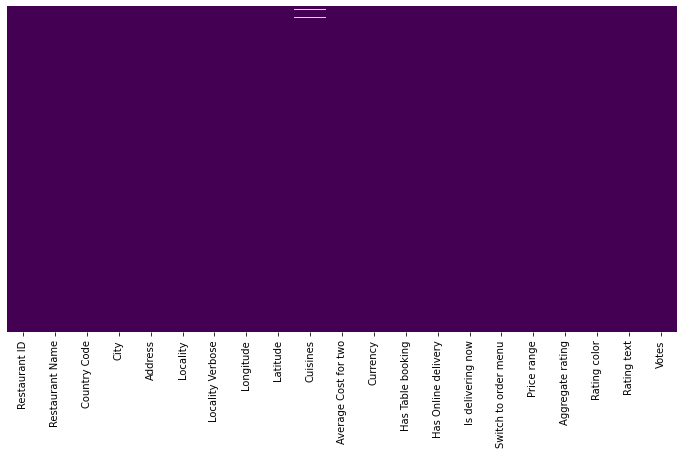

In [110]:
### to know missing values using heatmap
### here there are many records and nan values are less so we are not able to see here
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [73]:
df_countty = pd.read_excel("Country-Code.xlsx")
df_countty

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


#### our zomato dataset and df_country is also having country code so we can merge both of them 

In [76]:
### on is used for selecting the feature columns
### how is for selecting which type of join to be performed

Zomato_df = pd.merge(df1,df_countty,on = "Country Code",how = "left")
Zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [86]:
Zomato_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [79]:
country_names = Zomato_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [83]:
country_val = Zomato_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1d877dfbbb0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

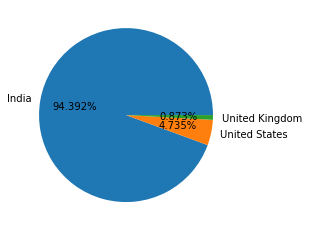

In [92]:
## pie char for top - 3countries that uses zomato

plt.pie(country_val[:3],labels = country_names[:3],autopct="%.3f%%")

#### observation :
from above we can say zomato's max transactions are from India and then USA , UK

In [94]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [100]:
df1.groupby(["Aggregate rating","Rating color","Rating text"]).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [105]:
ratings = df1.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns ={0:"Rating count"})
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### observation: 
1. whenever rating is b/w 4.5 to 4.9 ----> excellent
2.                 is b/w 4.0 to 4.4 ----> very good
3.                    b/w 3.5 to 3.9 ----> good
4.                    b/w 2.5 to 3.4 ----> average
5.                    b/w 2.0 to 2.4 ----> Poor

In [106]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

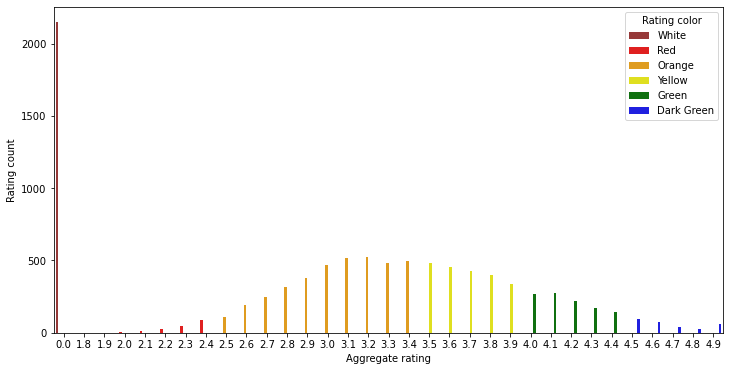

In [114]:
 ### we can increase the fig size using matplotlib 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,6)
sns.barplot(x = "Aggregate rating", y = "Rating count",hue="Rating color", data = ratings,palette = ["brown","red","orange","yellow","green","blue"])

#### observation :
1. not rated count is very high
2. max ratings are b/w 2.5 and 3.4

so, if we have any missing values in the rating we can replace them with value b/w 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

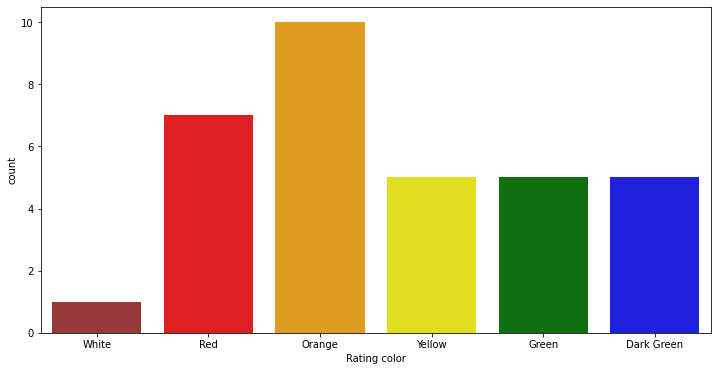

In [116]:
#count plot
# this count plot is not for the rating counts but it is for how frequent that particular color iis present int the records set
sns.countplot(x = "Rating color", data = ratings,palette = ["brown","red","orange","yellow","green","blue"])

#### lets find the country that has given 0 rating


In [133]:
Zomato_df[Zomato_df["Aggregate rating"]==0.0]["Country"].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

#### lets find out which currency is used by which country 


In [137]:
pd.DataFrame(Zomato_df.groupby(["Country","Currency"]).size())

,,0
Country,Currency,
Australia,Dollar($),24
Brazil,Brazilian Real(R$),60
Canada,Dollar($),4
India,Indian Rupees(Rs.),8652
Indonesia,Indonesian Rupiah(IDR),21
New Zealand,NewZealand($),40
Phillipines,Botswana Pula(P),22
Qatar,Qatari Rial(QR),20
Singapore,Dollar($),20


In [143]:
Zomato_df["Has Online delivery"].unique()

array(['No', 'Yes'], dtype=object)

#### which countries are having online delivery option

In [149]:
Zomato_df[Zomato_df["Has Online delivery"]=="Yes"]["Country"].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [153]:
Zomato_df.groupby(["Has Online delivery","Country"]).count()

Restaurant ID  Restaurant Name  \
Has Online delivery Country                                          
No                  Australia                  24               24   
                    Brazil                     60               60   
                    Canada                      4                4   
                    India                    6229             6229   
                    Indonesia                  21               21   
                    New Zealand                40               40   
                    Phillipines                22               22   
                    Qatar                      20               20   
                    Singapore                  20               20   
                    South Africa               60               60   
                    Sri Lanka                  20               20   
                    Turkey                     34               34   
                    UAE                        32               32   
                    United Kingdom             80               80   
                    United States             434              434   
Yes                 India                    2423             2423   
                    UAE                        28               28   

                                    Country Code  City  Address  Locality  \
Has Online delivery Country                                                 
No                  Australia                 24    24       24        24   
                    Brazil                    60    60       60        60   
                    Canada                     4     4        4         4   
                    India                   6229  6229     6229      6229   
                    Indonesia                 21    21       21        21   
                    New Zealand               40    40       40        40   
                    Phillipines               22    22       22        22   
                    Qatar                     20    20       20        20   
                    Singapore                 20    20       20        20   
                    South Africa              60    60       60        60   
                    Sri Lanka                 20    20       20        20   
                    Turkey                    34    34       34        34   
                    UAE                       32    32       32        32   
                    United Kingdom            80    80       80        80   
                    United States            434   434      434       434   
Yes                 India                   2423  2423     2423      2423   
                    UAE                       28    28       28        28   

                                    Locality Verbose  Longitude  Latitude  \
Has Online delivery Country                                                 
No                  Australia                     24         24        24   
                    Brazil                        60         60        60   
                    Canada                         4          4         4   
                    India                       6229       6229      6229   
                    Indonesia                     21         21        21   
                    New Zealand                   40         40        40   
                    Phillipines                   22         22        22   
                    Qatar                         20         20        20   
                    Singapore                     20         20        20   
                    South Africa                  60         60        60   
                    Sri Lanka                     20         20        20   
                    Turkey                        34         34        34   
                    UAE                           32         32        32   
                    United Kingdom                80         80        80   
         

#### pie char for city distribution

In [162]:
city_name = list(Zomato_df.City.value_counts().index)
city_name

['New Delhi',
 'Gurgaon',
 'Noida',
 'Faridabad',
 'Ghaziabad',
 'Bhubaneshwar',
 'Amritsar',
 'Ahmedabad',
 'Lucknow',
 'Guwahati',
 'Ludhiana',
 'Rest of Hawaii',
 'Kochi',
 'Kolkata',
 'Pocatello',
 'Pensacola',
 'Mumbai',
 'Mangalore',
 'Singapore',
 'Orlando',
 'Mysore',
 'Nagpur',
 'Nashik',
 'Coimbatore',
 'Dehradun',
 'Savannah',
 'Tampa Bay',
 'Sioux City',
 'Abu Dhabi',
 'Bangalore',
 'Aurangabad',
 'Allahabad',
 'Agra',
 'Sharjah',
 'Dubai',
 'Goa',
 'Bhopal',
 'Chennai',
 'Waterloo',
 'Indore',
 'Valdosta',
 'Puducherry',
 'Kanpur',
 'Jaipur',
 'Patna',
 'Macon',
 'Edinburgh',
 'London',
 'Manchester',
 'Pune',
 'Cedar Rapids/Iowa City',
 'Boise',
 'Cape Town',
 'Augusta',
 'Athens',
 'Albany',
 'Sí£o Paulo',
 'Rio de Janeiro',
 'Brasí_lia',
 'Pretoria',
 'Colombo',
 'Ankara',
 'Columbus',
 'Doha',
 'Dalton',
 'Varanasi',
 'Des Moines',
 'Birmingham',
 'Dubuque',
 'Ranchi',
 'Wellington City',
 'Auckland',
 'Surat',
 'Gainesville',
 'Davenport',
 'Vadodara',
 'Vizag',
 'Hyd

In [164]:
city_count = Zomato_df.City.value_counts().values
city_count

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

([<matplotlib.patches.Wedge at 0x1d802cd8340>,
 [Text(-0.6093229902525419, 0.9158195747797166, 'New Delhi'),
  Text(0.04855897468526975, -1.0989276709490554, 'Gurgaon'),
  Text(0.8689790405567204, -0.6744445322434767, 'Noida'),
  Text(1.08995637491287, -0.14830745357801672, 'Faridabad'),
  Text(1.099616212633222, -0.029054860422456693, 'Ghaziabad'),
  Text(1.0999622942144016, -0.00910776078903895, 'Bhubaneshwar')],
 [Text(-0.3323579946832046, 0.4995379498798454, '68.69'),
  Text(0.02648671346469259, -0.5994150932449392, '14.03'),
  Text(0.47398856757639285, -0.367878835769169, '13.55'),
  Text(0.5945216590433835, -0.0808949746789182, '3.15'),
  Text(0.5997906614363029, -0.015848105684976375, '0.31'),
  Text(0.5999794332078554, -0.004967869521293972, '0.26')])

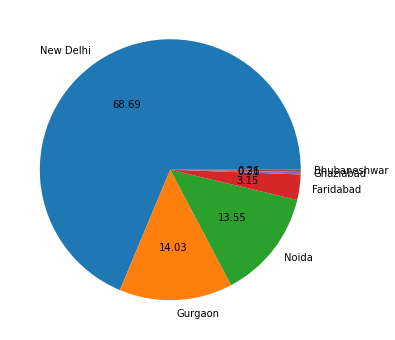

In [170]:
plt.pie(city_count[:6],labels= city_name[:6],autopct="%.2f")

#### lets find the top 10 cuisines


In [176]:
Zomato_df.Cuisines.value_counts().head(20)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: Cuisines, dtype: int64